**Dataset**: International Airline Passengers

**Model**: ARIMA

**Type**: Univariate

In [4]:
#!pip install pmdarima

In [5]:
# load packages
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# read dataset
df = pd.read_csv('..\..\datasets\AirPassengers.csv')

df.head(10) # univariate time series

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [6]:
df.shape

(144, 2)

In [7]:
# checking start and end dates of the dataset
raw_datetime =  pd.to_datetime(df['Month'], infer_datetime_format=True)
raw_datetime.min(), raw_datetime.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

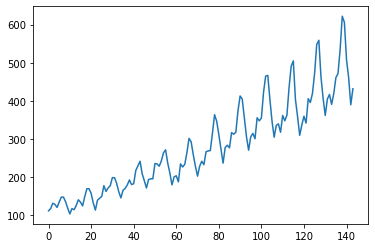

In [8]:
plt.plot(df['#Passengers'])

In [9]:
# converting the Month variable to datetime datatype
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [10]:
# set the index on Month variable
df.set_index('Month', inplace=True) 

df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


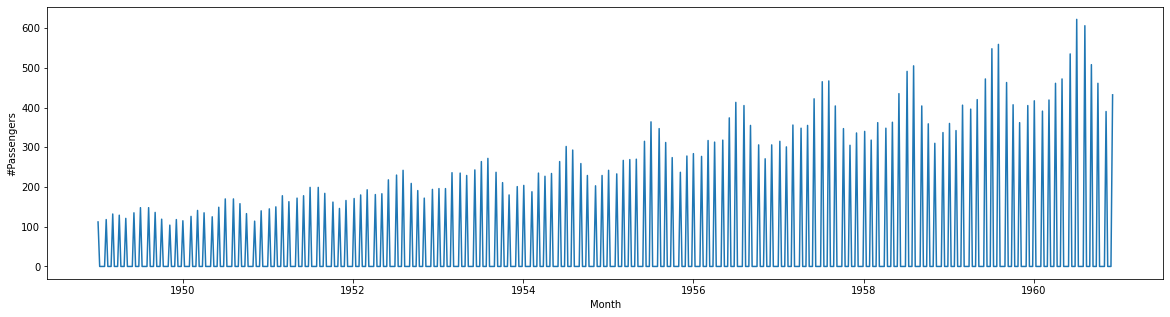

In [11]:
df_by_week = df.resample('W').sum()
fig,(ax1) = plt.subplots(nrows=1)
fig.set_size_inches(20, 5)
sns.lineplot(x = df_by_week.index, y= "#Passengers", data = df_by_week, ax = ax1);

In [12]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [13]:
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


<AxesSubplot:xlabel='month', ylabel='#Passengers'>

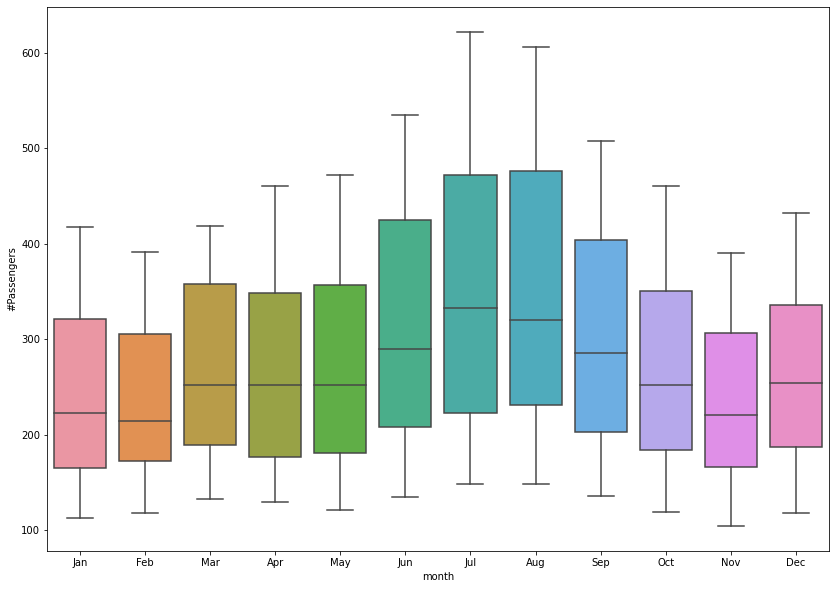

In [14]:
plt.figure(figsize=(14,10))

#Plot yearly and monthly values as boxplot
sns.boxplot(x='month', y='#Passengers', data=df)

### Is the data stationary? 
Dickey-Fuller test

In [16]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df['#Passengers'])
print("pvalue = ", pvalue)

pvalue =  0.991880243437641


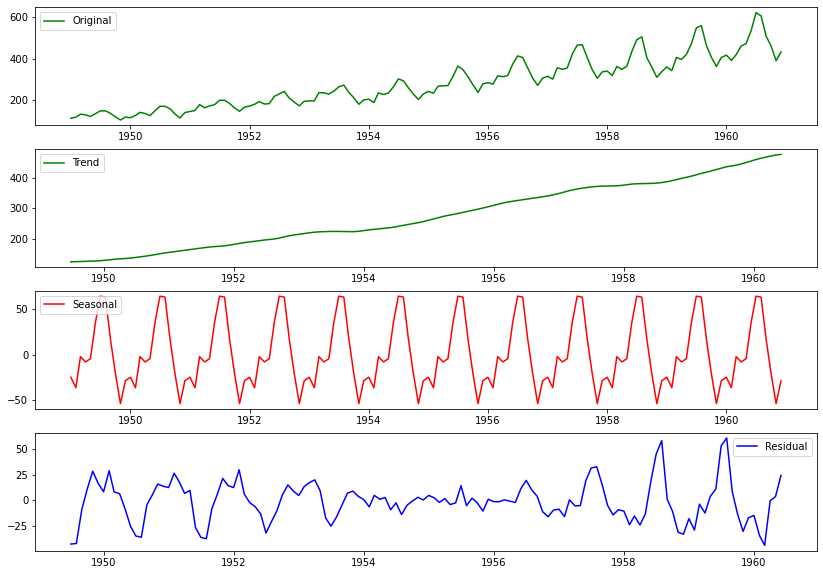

In [18]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['#Passengers'] , model ='additive')

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

trend = decomposed.trend
seasonal = decomposed.seasonal 
residual = decomposed.resid

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original', color='green')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper right')
plt.show()

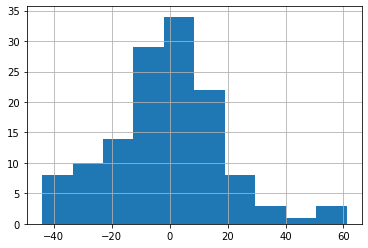

In [19]:
hist = residual.hist()

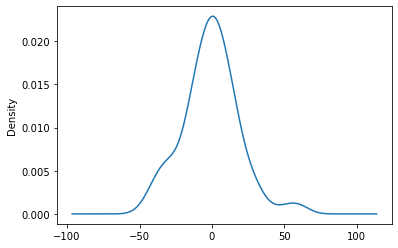

In [20]:
residual.plot(kind='kde')
plt.show()

### Estimating (p, q , d)¶
Check Autocorrelation (Correlogram) and the Partial Autocorrelation.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

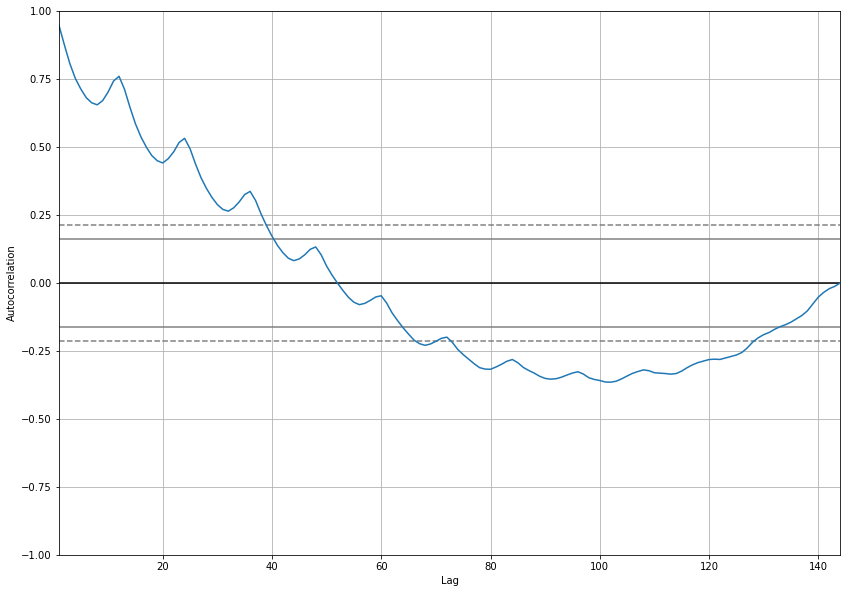

In [23]:
plt.figure(figsize=(14,10))

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['#Passengers'])

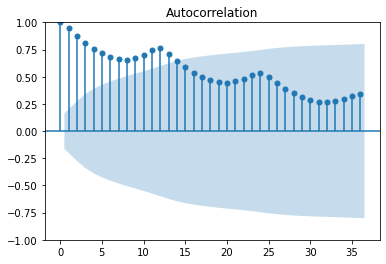

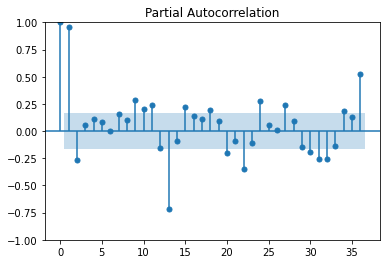

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df['#Passengers'], lags=36) 
plt.show()

plot_pacf(df['#Passengers'], lags=36) 
plt.show()

ARIMA model with  𝑝=0  or  1 ,  𝑞=1 , and  𝑑=1

In [27]:
# load the original dataset again
df = pd.read_csv('..\..\datasets\AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) 

In [28]:
df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Splitting Train and Test

In [30]:
train_size = int(len(df) * 0.66)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
print(len(train), len(test))
# test.shape

95 49


In [31]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model = ARIMA(df['#Passengers'], order=(1,1,1))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 25 Jan 2023   AIC                           1394.683
Time:                        04:50:55   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

C:\Users\kamon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kamon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kamon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Inspect model residuals 

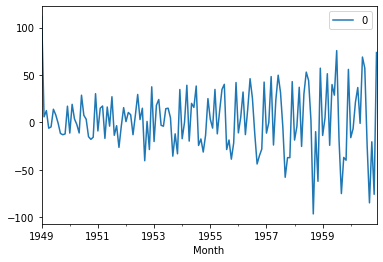

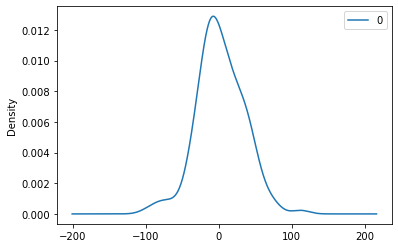

In [32]:
# line plot of residuals
residuals = DataFrame(model_fit.resid) 

residuals.plot()

plt.show()
# density plot of residuals 
residuals.plot(kind='kde', label='Residuals')
plt.show()

In [33]:
# summary stats of residuals 
print(residuals.describe())

                0
count  144.000000
mean     2.705411
std     32.293238
min    -96.360708
25%    -16.812276
50%      0.056039
75%     24.475020
max    112.000000


<AxesSubplot:xlabel='Month'>

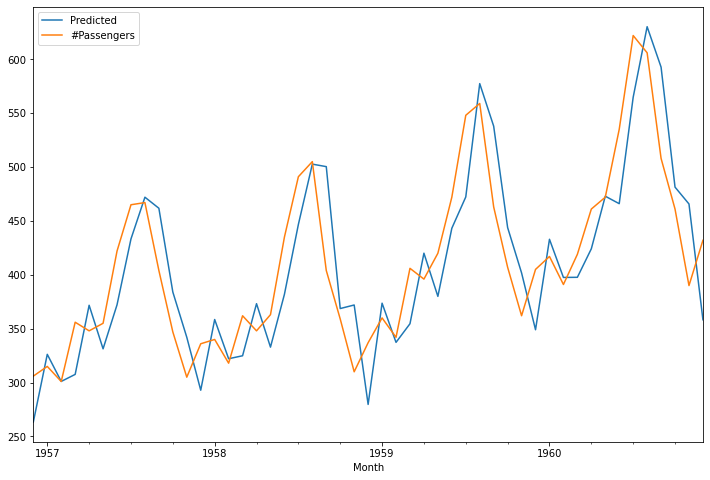

In [35]:
#Train prediction
start_index = 0
end_index = len(train)-1
train_prediction = model_fit.predict(start_index, end_index) 

#Prediction (test set)
start_index = len(train)
end_index = len(df)-1
prediction = model_fit.predict(start_index, end_index).rename('Predicted ') 
#Rename the column

# plot predictions and actual values
plt.figure(figsize=(12,8))
prediction.plot(legend = True)
test['#Passengers'].plot(legend = True)   # true values

### Evaluate the model — RMSE 
MAE, MSE (alternatives)

In [36]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.20 RMSE
Test Score: 43.93 RMSE


$R^2$

In [37]:
from sklearn.metrics import r2_score
score = r2_score(test, prediction)
print("R2 score is: ", score)

R2 score is:  0.6858272419662402


### Predict next two years
a value for each month of future 24.

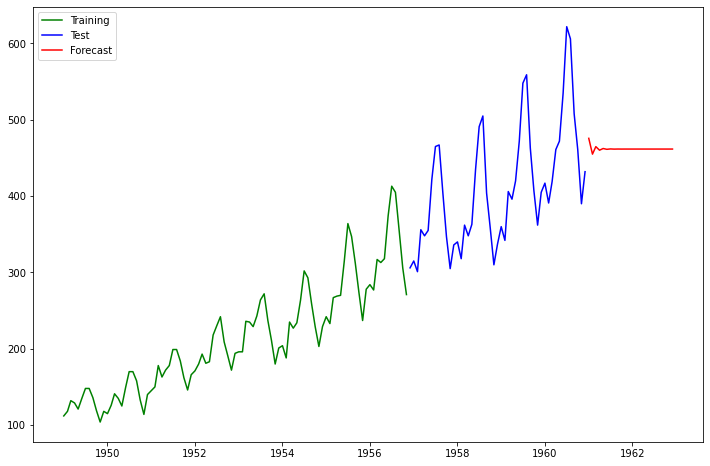

In [39]:
forecast = model_fit.predict(start = len(df),  
                          end = (len(df)-1) +2 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(train, label='Training', color='green')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.show()

### Rolling Forecast and Validation 
Walk forward validation

In [41]:
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error 
from math import sqrt

X = df.values
size = int(len(X) * 0.9)
trainR, testR = X[0:size], X[size:len(X)] 
history = [x for x in trainR] 
predictionsR = list()

# walk-forward validation
for t in range(len(testR)):
  model = ARIMA(history, order=(5,1,0)) 
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0] 
  predictionsR.append(yhat)
  obs = testR[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=415.026125, expected=407.000000
predicted=392.219975, expected=362.000000
predicted=365.550227, expected=405.000000
predicted=458.449443, expected=417.000000
predicted=425.806071, expected=391.000000
predicted=383.785947, expected=419.000000
predicted=417.446171, expected=461.000000
predicted=468.648234, expected=472.000000
predicted=471.498326, expected=535.000000
predicted=541.455152, expected=622.000000
predicted=631.506421, expected=606.000000
predicted=580.686925, expected=508.000000
predicted=460.585028, expected=461.000000
predicted=451.498308, expected=390.000000
predicted=384.126512, expected=432.000000


Test RMSE: 45.563


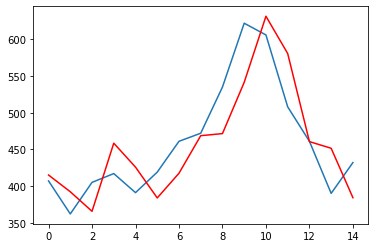

In [42]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(testR, predictionsR)) 
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes 
plt.plot(testR)
plt.plot(predictionsR, color='red') 
plt.show()

Notice: Some code chunks are the adapted ones. Credits to original author.